start


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout) 

/tmp/ipykernel_31/12563204.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])


Epoch 1/25


2023-05-04 13:11:01.358370: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 257s 1s/step - loss: 2.1976 - accuracy: 0.3374 - val_loss: 1.3802 - val_accuracy: 0.5859
Epoch 2/25
192/192 [==============================] - 196s 1s/step - loss: 1.2087 - accuracy: 0.6365 - val_loss: 0.9369 - val_accuracy: 0.7232
Epoch 3/25
192/192 [==============================] - 193s 1s/step - loss: 0.8902 - accuracy: 0.7257 - val_loss: 0.8028 - val_accuracy: 0.7566
Epoch 4/25
192/192 [==============================] - 194s 1s/step - loss: 0.7215 - accuracy: 0.7726 - val_loss: 0.6561 - val_accuracy: 0.7992
Epoch 5/25
192/192 [==============================] - 195s 1s/step - loss: 0.6492 - accuracy: 0.7953 - val_loss: 0.4575 - val_accuracy: 0.8557
Epoch 6/25
192/192 [==============================] - 200s 1s/step - loss: 0.5019 - accuracy: 0.8396 - val_loss: 0.3575 - val_accuracy: 0.8967
Epoch 7/25
192/192 [==============================] - 204s 1s/step - loss: 0.4271 - accuracy: 0.8629 - val_loss: 0.2773 - val_accuracy: 0.9199
Epoch 8/25

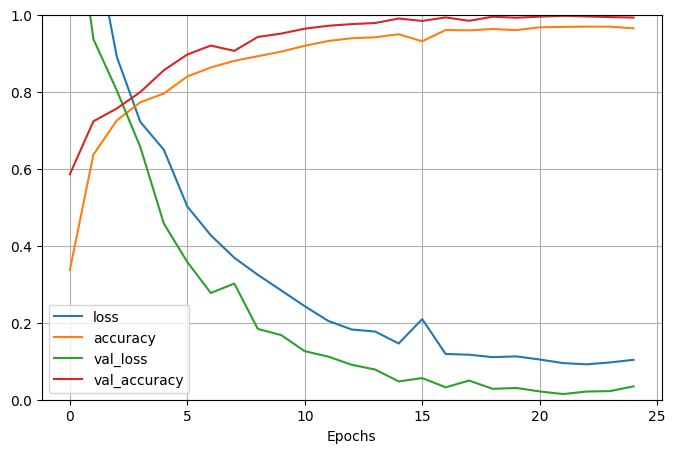

The End


In [1]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
# from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/chromagram-mfcc/Chromagrams/Chromagrams', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/chromagram-mfcc/Chromagrams/Chromagrams', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/chromagram-mfcc/Chromagrams/Chromagrams', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('ChromaCNN_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_ChromaCNN.csv')
plt.grid(True)
plt.xlabel('Epochs')
plt.gca().set_ylim(0,1)
plt.savefig("ChromaCNN_graph.png")
plt.show()

print("The End")

start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 

/tmp/ipykernel_31/1758671235.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])


Epoch 1/25


2023-05-04 14:39:37.068813: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 167s 869ms/step - loss: 2.4412 - accuracy: 0.2491 - val_loss: 1.4884 - val_accuracy: 0.5385
Epoch 2/25
192/192 [==============================] - 122s 635ms/step - loss: 0.7617 - accuracy: 0.7847 - val_loss: 0.3724 - val_accuracy: 0.8973
Epoch 3/25
192/192 [==============================] - 120s 625ms/step - loss: 0.2964 - accuracy: 0.9129 - val_loss: 0.1731 - val_accuracy: 0.9525
Epoch 4/25
192/192 [==============================] - 120s 627ms/step - loss: 0.1795 - accuracy: 0.9495 - val_loss: 0.1001 - val_accuracy: 0.9734
Epoch 5/25
192/192 [==============================] - 126s 655ms/step - loss: 0.1094 - accuracy: 0.9672 - val_loss: 0.0612 - val_accuracy: 0.9824
Epoch 6/25
192/192 [==============================] - 117s 612ms/step - loss: 0.0917 - accuracy: 0.9722 - val_loss: 0.0665 - val_accuracy: 0.9840
Epoch 7/25
192/192 [==============================] - 116s 607ms/step - loss: 0.0706 - accuracy: 0.9799 - val_loss: 0.0498 - val_accura

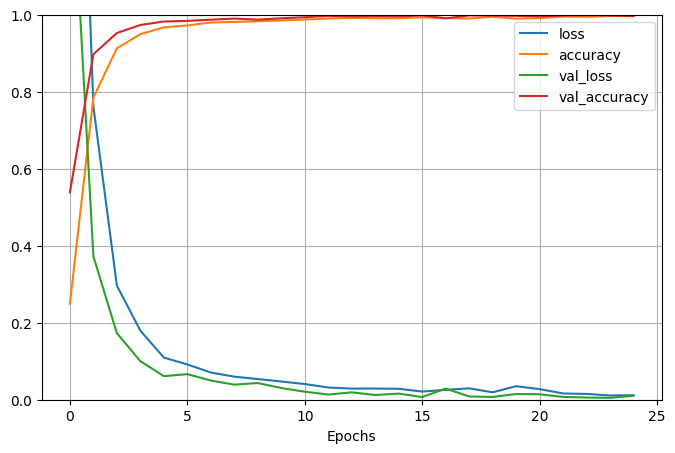

The End


In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
# from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/chromagram-mfcc/MFCCs/MFCCs', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/chromagram-mfcc/MFCCs/MFCCs', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/chromagram-mfcc/MFCCs/MFCCs', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('MFCC_CNN_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_MFCC_CNN.csv')
plt.grid(True)
plt.xlabel('Epochs')
plt.gca().set_ylim(0,1)
plt.savefig("MFCC_CNN_graph.png")
plt.show()

print("The End")